In [36]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
with open("data/monotonicity/master_df_parsed.pickle", "rb") as x:
    df = pickle.load(x)

# Mark runs with speciation according to the 15 decade criteria
df['speciation_bool'] = df['speciation_ybp'].notna()

# Calculate time_to_speciation
df['time_to_speciation'] = 30000 - df['speciation_ybp']

In [53]:
df.groupby(['expn_sigma_e'])['speciation_bool'].mean()

expn_sigma_e
-4.00    0.000000
-3.25    0.000000
-2.50    0.000000
-2.00    0.968909
-1.75    0.040000
-1.00    0.000000
Name: speciation_bool, dtype: float64

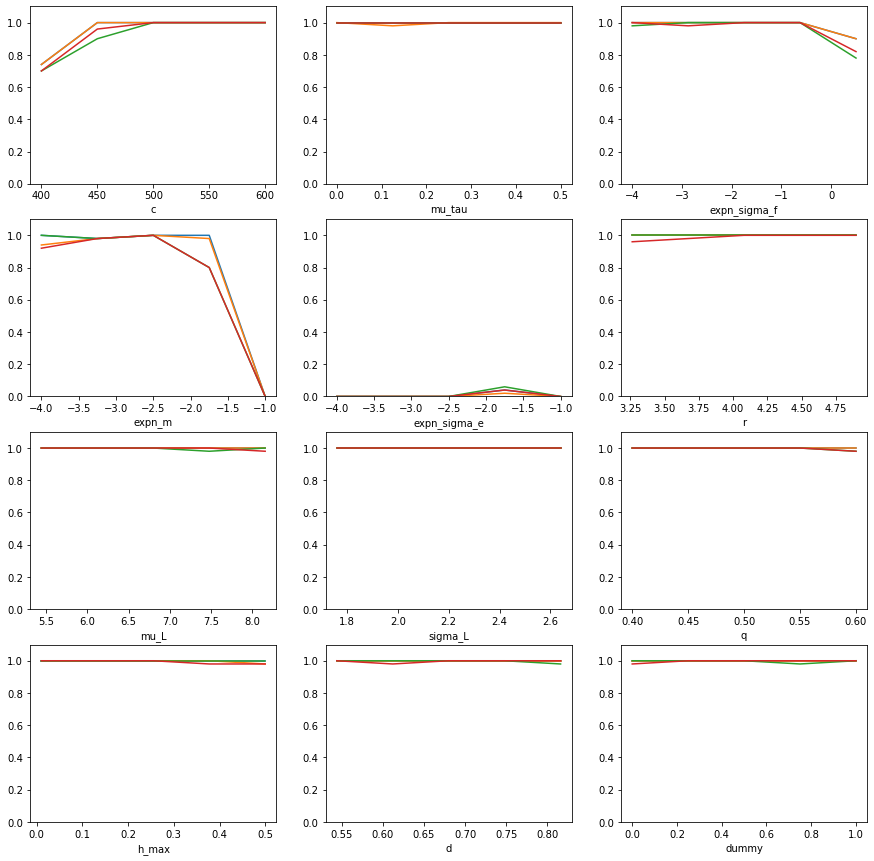

In [52]:
fig, ax = plt.subplots(4, 3, figsize = (15, 15))

# Iterate over the parameters. 
for n, param in enumerate(df['param_changing'].unique()):
    
    row = n // 3
    col = n % 3
    
    #print(row, col)
    
    # Subset to reps where this param is changing. 
    sub_df = df[df['param_changing'] == param]
    
    # For each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            
            #import pdb; pdb.set_trace()
            sub_df2.groupby(param)['speciation_bool'].mean().plot(kind='line', ax = ax[row, col])
            ax[row, col].set_ylim(0, 1.1)

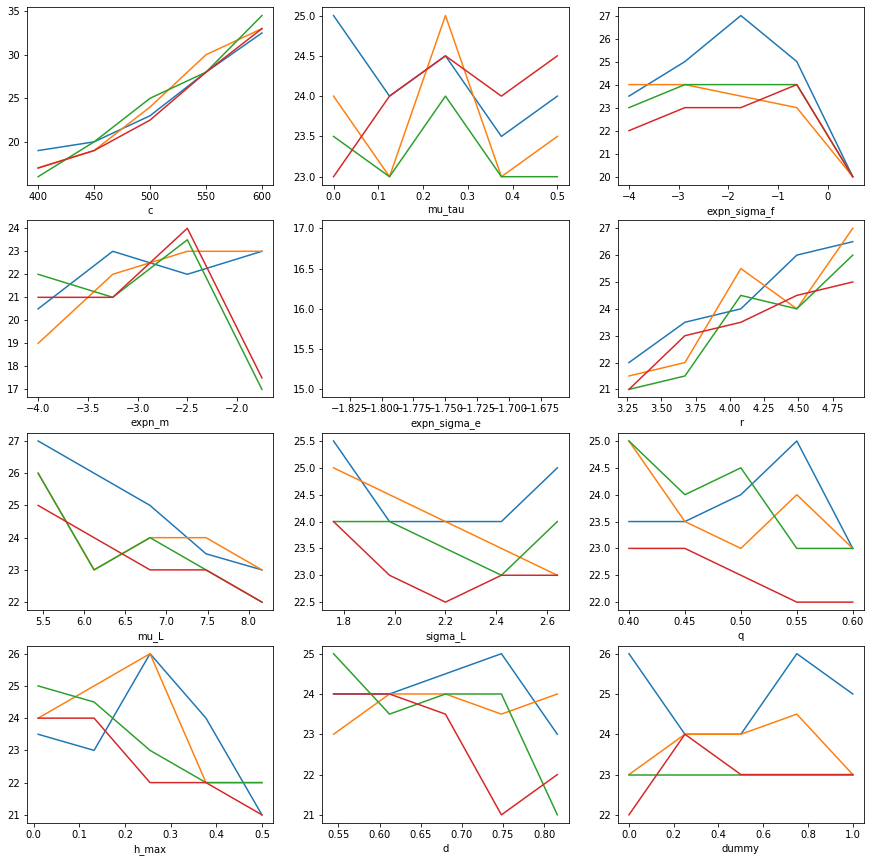

In [40]:
fig, ax = plt.subplots(4, 3, figsize = (15, 15))

# Iterate over the parameters. 
for n, param in enumerate(df['param_changing'].unique()):
    
    row = n // 3
    col = n % 3
    
    #print(row, col)
    
    # Subset to reps where this param is changing. 
    sub_df = df[df['param_changing'] == param]
    
    # For each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            
            # Subset to runs that had speciation 
            sub_df2 = sub_df2[sub_df2['speciation_bool']] # !!! change to only include parameter sets with at least a certain number of repetitions
            
            # Plot max streak
            sub_df2.groupby(param)['max_streak'].median().plot(kind='line', ax = ax[row, col])

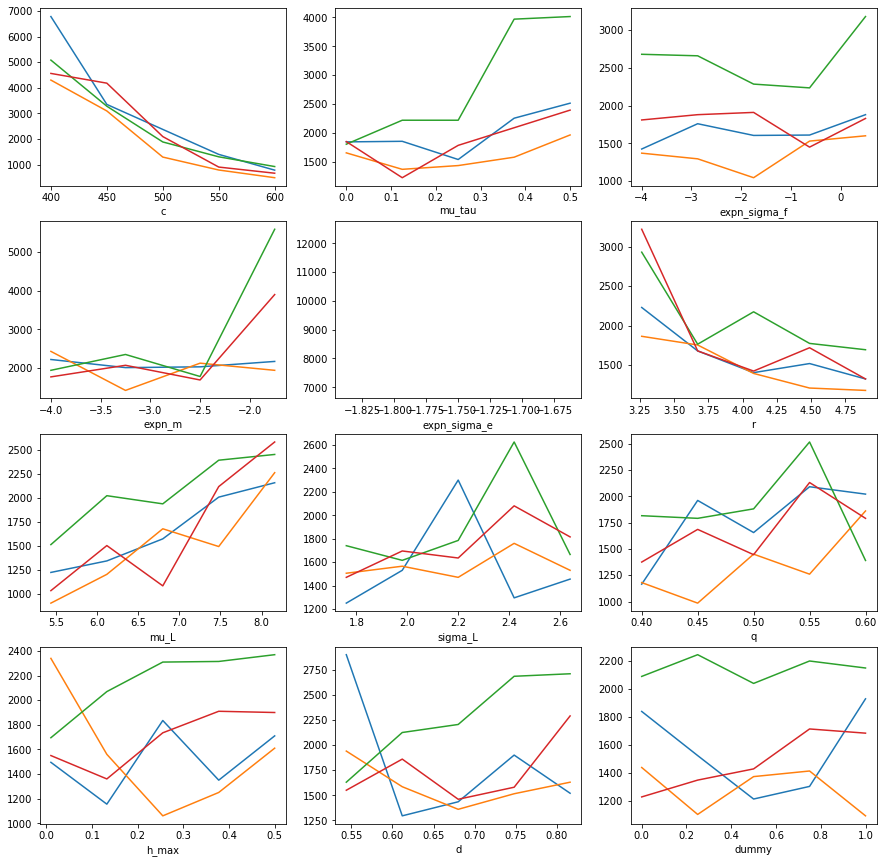

In [41]:
fig, ax = plt.subplots(4, 3, figsize = (15, 15))

# Iterate over the parameters. 
for n, param in enumerate(df['param_changing'].unique()):
    
    row = n // 3
    col = n % 3
    
    #print(row, col)
    
    # Subset to reps where this param is changing. 
    sub_df = df[df['param_changing'] == param]
    
    # For each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            
            # Subset to runs that had speciation 
            sub_df2 = sub_df2[sub_df2['speciation_bool']] # !!! change to only include parameter sets with at least a certain number of repetitions
            
            # Plot max streak
            sub_df2.groupby(param)['time_to_speciation'].median().plot(kind='line', ax = ax[row, col])